# Preliminares

## Dependências

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.linear_model import LinearRegression

## Método - cria resultado de regressão multilinear

In [2]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = metrics.explained_variance_score(y_true, y_pred)
    #msle = metrics.mean_squared_log_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mdae = metrics.median_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred) 
    r2 = metrics.r2_score(y_true, y_pred)
    error_perc = np.mean((y_pred - y_true)/y_true)
    rmse = np.sqrt(mse)
    acc = (rmse/mae-1)

    print('Explained Variance: ', round(ev, 6))    
    #print('Mean Square Log Error: ', round(msle, 6))
    print('Mean Absolute Error: ', round(mae, 6))
    print('Median Absolute Error: ', round(mdae, 6))
    print('Mean Squared Error: ', round(mse, 8))
    print('Root Mean Squared Error: ', round(rmse, 6))
    print('R2: ', round(r2, 6))
    print('Mean Percentual Error: ', error_perc)
    print('Acc(RMSE/MAE - 1): ', round(acc, 6))

## Método - cria um dataframe com as principais métricas de resultado

In [3]:
def creates_df_compare(y_test,y_pred):
    df_compare = pd.DataFrame({'actual': y_test, 'pred': y_pred})

    df_compare['error'] = df_compare['actual'] - df_compare['pred']

    df_compare['residue'] = np.abs(df_compare['actual'] - df_compare['pred'])

    df_compare['residue_sqr'] = df_compare['residue']**2
    
    avg_actual = df_compare['actual'].mean()
    
    df_compare['var'] = (df_compare['actual'] - avg_actual)**2
    
    return df_compare

## Método - Cria gráfico de erro relativo (real vs predito)

In [4]:
def real_vs_predicted(df,yhat,y):
    
    y
    yhat 
    x = list(range(len(y)))

    d = y - yhat
    mse = np.mean(d**2)
    mae = np.mean(abs(d))
    rmse = np.sqrt(mse)
    r2 = 1 - (sum(d**2)/sum((y - np.mean(y))**2))

    print("Results by manual calculation:")
    print("Mean Absolut Error:",mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-Squared:", r2)

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,8))
    fig.suptitle('Lannate Density: Original vs Predicted')


    ax1.plot(x, y, color="blue", label="original")
    ax1.set_ylabel('Original vs Predicted')
    ax1.plot(x, yhat, color="red", label="original")

    ax2.plot(x, y, color="blue", label="original")
    ax2.set_ylabel('Original')

    ax3.plot(x, yhat, color="red", label="predicted",)
    ax3.set_ylabel('Predicted')

    plt.show()

# Análise Exploratória dos Dados

## Lendo o dataframe

In [5]:
df = pd.read_csv('listings_full.csv',encoding = 'utf-8', delimiter=',',low_memory = False)

pd.set_option('display.max_columns', 151)

df.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",221.00,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,8,38,304,2021-02-23,260,12,2,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",307.00,3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0,0,0,10,2021-02-23,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,2012-10-03,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a few hours,97%,78%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitchen"

## Corrigindo problema com a variável price

In [6]:
df.replace(',','', regex=True, inplace=True)

df['price'] = df['price'].astype(float)

df['price']

0         221.0
1         307.0
2         160.0
3         273.0
4         135.0
          ...  
26610      94.0
26611     141.0
26612    2500.0
26613     160.0
26614     316.0
Name: price, Length: 26615, dtype: float64

## Criando nova variável minimum_price

In [7]:
df['minimum_price'] = df['minimum_nights'] * df['price']

## Informações do dataframe

Aqui aplicamos a função info() para verificar quais são as variáveis/features do dataframe.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26615 non-null  int64  
 1   listing_url                                   26615 non-null  object 
 2   scrape_id                                     26615 non-null  int64  
 3   last_scraped                                  26615 non-null  object 
 4   name                                          26586 non-null  object 
 5   description                                   25160 non-null  object 
 6   neighborhood_overview                         14314 non-null  object 
 7   picture_url                                   26615 non-null  object 
 8   host_id                                       26615 non-null  int64  
 9   host_url                                      26615 non-null 

## Contando valores de algumas variáveis nominais

In [9]:
df.room_type.value_counts()

Entire home/apt    19285
Private room        6619
Shared room          612
Hotel room            99
Name: room_type, dtype: int64

In [10]:
df.neighbourhood.value_counts()

Rio de Janeiro Brazil                            5530
Copacabana Rio de Janeiro Brazil                 2338
Barra da Tijuca Rio de Janeiro Brazil             790
Rio Rio de Janeiro Brazil                         741
Ipanema Rio de Janeiro Brazil                     573
                                                 ... 
Rio de Janeiro  Brazil Brazil                       1
Rio de Janriro Rio de Janeiro Brazil                1
Recreio do Bandeirantes Rio de Janeiro Brazil       1
Campinho Rio de Janeiro Brazil                      1
Engenho de Dentro  Rio de Janeiro Brazil            1
Name: neighbourhood, Length: 271, dtype: int64

## Verificando tipos da variável neighbourhood

In [11]:
df.neighbourhood_cleansed.unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo',
       'Santa Teresa', 'Gávea', 'Leblon', 'Jacarepaguá', 'Campo Grande',
       'Laranjeiras', 'Humaitá', 'São Conrado', 'Botafogo', 'Centro',
       'Vidigal', 'Santo Cristo', 'Itanhangá', 'São Cristóvão',
       'Maracanã', 'Glória', 'Tijuca', 'Lagoa', 'São Francisco Xavier',
       'Catete', 'Pitangueiras', 'Marechal Hermes', 'Jardim Botânico',
       'Senador Camará', 'Irajá', 'Vargem Grande',
       'Recreio dos Bandeirantes', 'Leme', 'Anil', 'Vargem Pequena',
       'Estácio', 'Cosme Velho', 'Gardênia Azul', 'Taquara', 'Bangu',
       'Urca', 'Grajaú', 'Joá', 'Alto da Boa Vista', 'Penha Circular',
       'Vila Isabel', 'Jardim Sulacap', 'Praça da Bandeira', 'Encantado',
       'Rio Comprido', 'Lins de Vasconcelos', 'Cosmos', 'Santíssimo',
       'Gamboa', 'Bonsucesso', 'Camorim', 'Piedade', 'Vila da Penha',
       'Olaria', 'Vila Valqueire', 'Cidade de Deus', 'Riachuelo',
       'Barra de Guaratiba', 'Praça Seca', 'Pa

## Analisando o room_type

In [12]:
df.groupby(['room_type']).agg({'price':'mean','minimum_nights':'mean','minimum_price':'mean','number_of_reviews':'mean'})

,price,minimum_nights,minimum_price,number_of_reviews
room_type,,,,
Entire home/apt,823.069277,5.172051,5222.780244,13.741146
Hotel room,325.212121,2.949495,624.050505,22.151515
Private room,448.315758,3.565191,1247.959964,8.263484
Shared room,1456.738562,3.480392,15968.480392,2.266340


## Descrição estatística do dataframe

Foram indentificados alguns outliers no dataframe. As variáveis price, minimum_nights, number_of_reviews, reviews_per_month e availability_365.

In [13]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,minimum_price
count,2.661500e+04,2.661500e+04,2.661500e+04,26591.000000,26591.000000,0.0,26615.000000,26615.000000,26615.000000,0.0,24869.000000,26363.000000,26615.000000,26615.000000,2.661500e+04,26531.000000,26531.000000,2.653100e+04,2.653100e+04,26531.000000,2.653100e+04,0.0,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16118.000000,16104.000000,16107.000000,16106.000000,16110.000000,16106.000000,16108.000000,0.0,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000,2.661500e+04
mean,2.526448e+07,2.021022e+13,1.006657e+08,9.367568,9.367568,NaN,-22.965837,-43.248533,4.161112,NaN,1.707909,2.548230,742.589254,4.725268,3.819109e+04,4.660510,5.032038,3.842962e+04,3.843929e+04,4.788828,3.843440e+04,NaN,19.245200,41.221379,64.233440,219.438174,12.146308,2.341725,0.296487,94.571349,9.636612,9.392376,9.799888,9.758535,9.759717,9.296374,NaN,9.665414,8.259177,1.295022,0.087620,0.629190,4.464252e+03
std,1.573416e+07,4.175860e+00,1.090670e+08,93.121768,93.121768,NaN,0.034971,0.096296,2.494174,NaN,1.054267,2.127716,5368.868834,19.102522,6.129662e+06,18.908336,19.572665,6.139357e+06,6.139357e+06,19.222567,6.139357e+06,NaN,12.455029,23.794758,34.644936,141.525405,29.722813,5.707102,0.882080,9.740887,0.940490,1.138224,0.767390,0.829072,0.749132,1.053340,NaN,35.942124,31.611146,5.300625,0.622397,0.876064,5.793551e+04
min,1.787800e+04,2.021022e+13,3.607000e+03,0.000000,0.000000,NaN,-23.072920,-43.704790,0.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,0.000000e+00
25%,1.220219e+07,2.021022e+13,1.431500e+07,1.000000,1.000000,NaN,-22.984570,-43.304090,2.000000,NaN,1.000000,1.000000,157.000000,1.000000,3.000000e+01,1.000000,2.000000,9.000000e+01,9.000000e+01,1.600000,9.000000e+01,NaN,3.000000,23.000000,43.000000,88.000000,0.000000,0.000000,0.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.090000,3.150000e+02
50%,2.374090e+07,2.021022e+13,6.026326e+07,1.000000,1.000000,NaN,-22.971700,-43.196210,4.000000,NaN,1.000000,2.000000,280.000000,2.000000,1.000000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.200000,1.125000e+03,NaN,27.000000,56.000000,86.000000,254.000000,2.000000,0.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.270000,7.000000e+02
75%,4.089613e+07,2.021022e+13,1.546962e+08,4.000000,4.000000,NaN,-22.951575,-43.186300,5.000000,NaN,2.000000,3.000000,550.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,30.000000,59.000000,89.000000,363.000000,9.000000,2.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,2.000000,1.000000,0.000000,0.850000,1.750000e+03
max,4.827600e+07,2.021022e+13,3.892463e+08,7218.000000,7218.000000,NaN,-22.749820,-43.104860,16.000000,NaN,30.000000,50.000000,

## Distribuição de variáveis numéricas

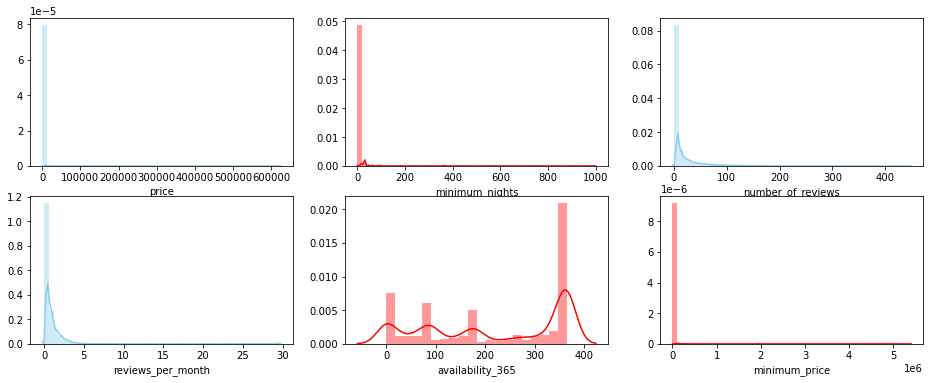

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))

sns.distplot(df['price'] , color = 'skyblue', label = 'price', ax = axes[0,0])
sns.distplot(df['minimum_nights'] , color = 'red', label = 'minimum_nights', ax = axes[0,1])
sns.distplot(df['number_of_reviews'] , color = 'skyblue', label = 'number_of_reviews', ax = axes[0,2])
sns.distplot(df['reviews_per_month'] , color = 'skyblue', label = 'reviews_per_month', ax = axes[1,0])
sns.distplot(df['availability_365'] , color = 'red', label = 'availability_365', ax=axes[1,1])
sns.distplot(df['minimum_price'] , color = 'red', label = 'minimum_price', ax=axes[1,2])

## Analisando variáveis numéricas

In [15]:
col_float = [
'accommodates',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes',
'calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms',
'reviews_per_month',
]

df_float = df[col_float].copy()

df_float

,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5,2.0,2.0,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,0,8,38,304,260,12,2,94.0,9.0,9.0,10.0,10.0,10.0,9.0,1,1,0,0,2.01
1,2,1.0,1.0,3,90,3.0,3.0,90.0,90.0,3.0,90.0,0,0,0,10,85,0,0,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,1,0,0,0.67
2,2,1.0,2.0,7,60,7.0,7.0,60.0,60.0,7.0,60.0,0,23,53,328,238,0,0,94.0,9.0,9.0,9.0,10.0,10.0,9.0,11,11,0,0,1.82
3,2,1.0,1.0,2,89,2.0,2.0,89.0,89.0,2.0,89.0,0,0,0,207,181,2,0,94.0,10.0,9.0,10.0,10.0,10.0,9.0,1,1,0,0,2.02
4,2,1.0,1.0,3,15,3.0,3.0,3.0,15.0,3.0,15.0,4,4,22,101,353,25,4,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26610,1,1.0,1.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,30,60,90,180,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,4,0,NaN
26611,6,2.0,3.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
26612,8,4.0,4.0,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,25,55,85,360,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
26613,6,3.0,4.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,1,1,1,269,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2,0,NaN


## Analisando correlação entre variáveis numéricas (full df)

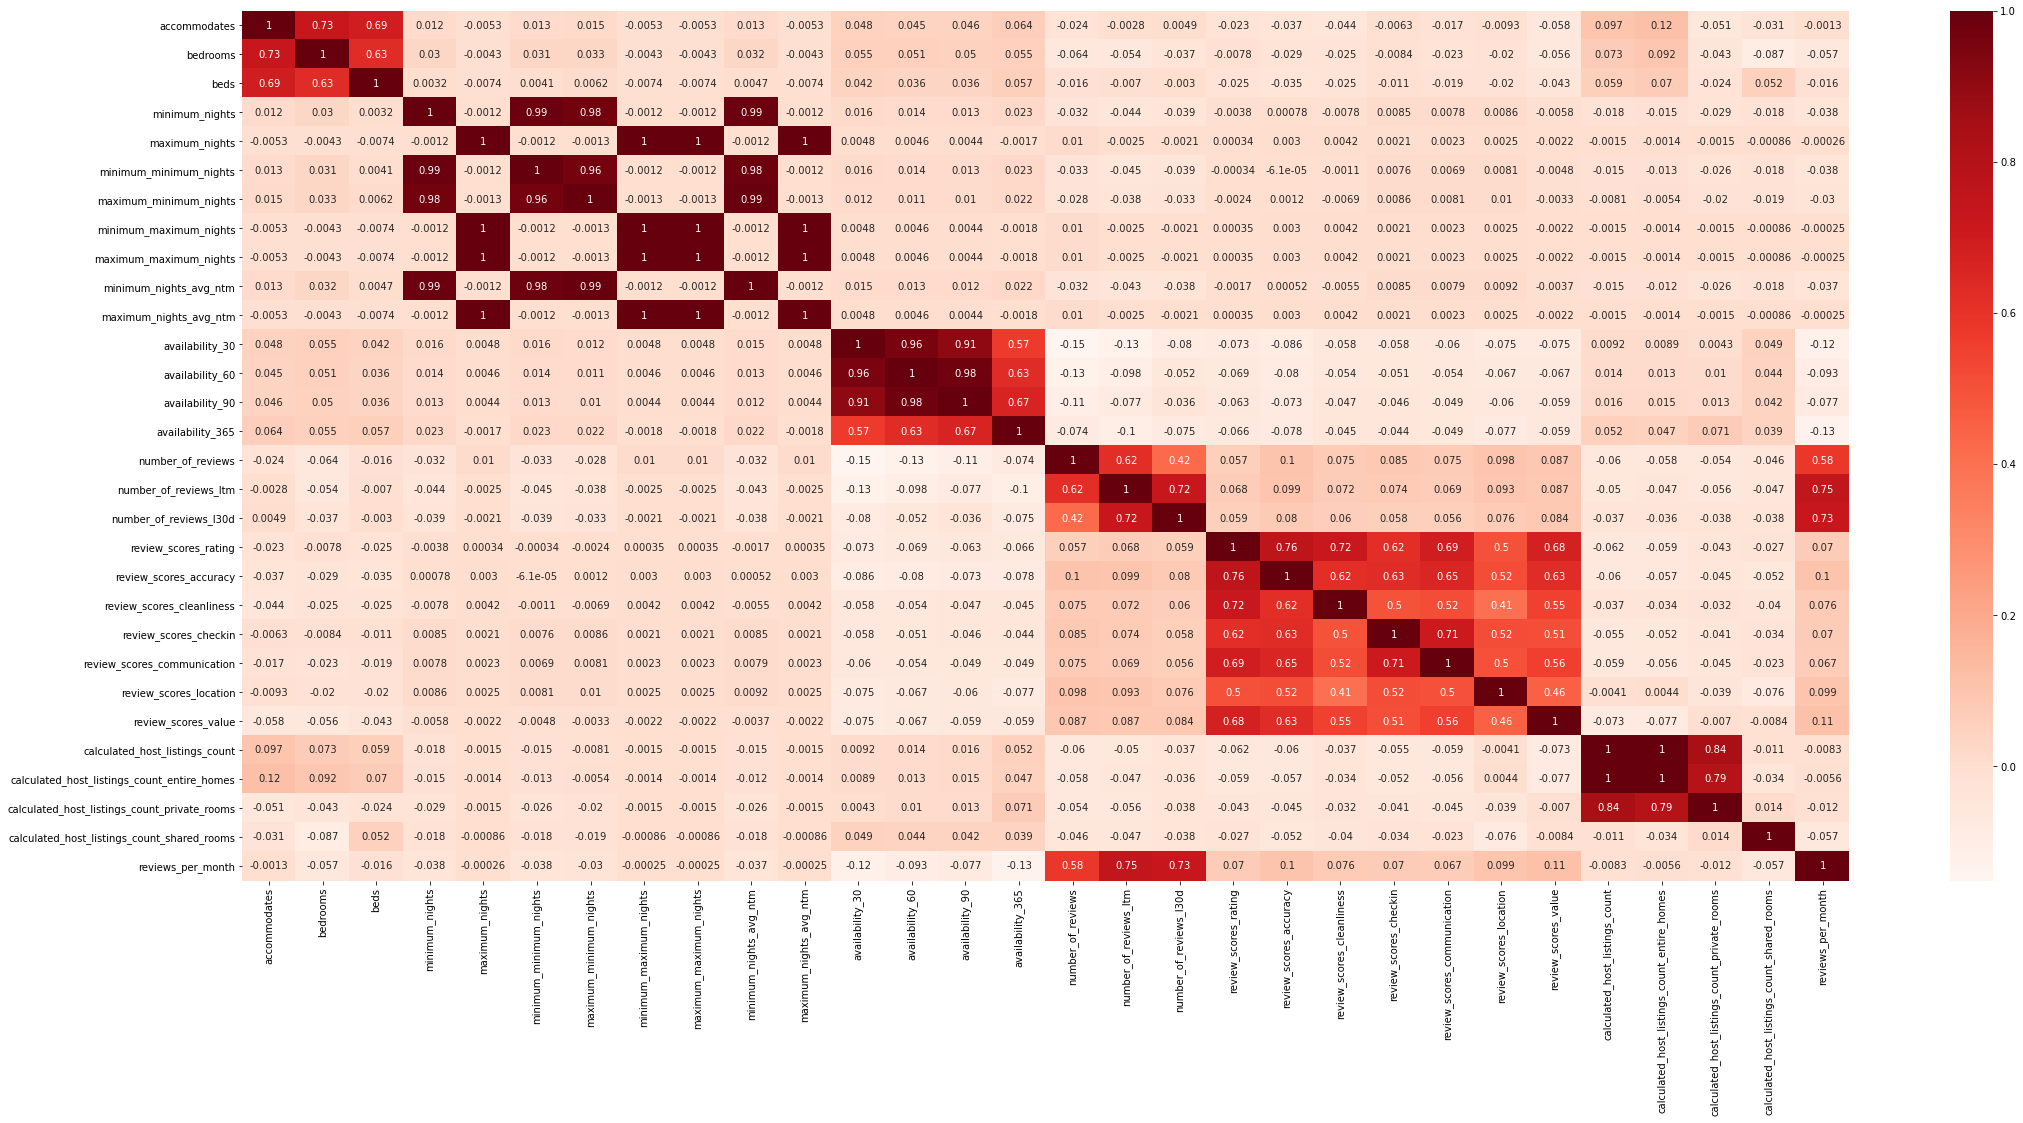

In [16]:
plt.figure(figsize=(36,16))
cor = df_float.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Analisando outliers

In [17]:
pd.set_option('display.max_rows', 151)

df.groupby(['neighbourhood_cleansed']).agg({'price':'mean',
                                   'minimum_nights':'mean',
                                   'minimum_price':'mean',
                                   'number_of_reviews':'mean',
                                   'reviews_per_month':'mean',
                                   'neighbourhood':'count',
                                  })

,price,minimum_nights,minimum_price,number_of_reviews,reviews_per_month,neighbourhood
neighbourhood_cleansed,,,,,,
Abolição,374.000000,6.000000,2301.400000,0.200000,0.020000,3
Acari,250.000000,1.000000,250.000000,0.000000,NaN,1
Alto da Boa Vista,4458.255814,10.534884,8136.720930,6.674419,0.643182,22
Anchieta,2822.000000,2.000000,3622.000000,0.000000,NaN,2
Andaraí,1134.098039,4.000000,5871.333333,2.980392,0.270909,28
Anil,450.595238,4.119048,1867.952381,1.333333,0.188000,9
Bancários,154.666667,1.333333,192.666667,0.666667,2.000000,2
Bangu,3181.105263,3.684211,43536.684211,1.105263,0.465000,6
Barra da Tijuca,977.859398,5.021292,6345.301395,10.001468,0.668802,1375


## Contando a quantidade de neighbourhood

In [18]:
df['neighbourhood_count'] = df.groupby('neighbourhood_cleansed')['neighbourhood_cleansed'].transform('count')

## Filtrando neighbourhood com menos de 100 aparições

In [19]:
df_model = df[(np.abs(stats.zscore(df.price)) < 2) & 
            (np.abs(stats.zscore(df.minimum_nights)) < 2) &
            (df.neighbourhood_count > 100)
           ]

len(df_model)

24204

In [20]:
df_model.groupby(['neighbourhood_cleansed']).agg({'price':'mean',
                                       'minimum_nights':'mean',
                                       'minimum_price':'mean',
                                       'number_of_reviews':'mean',
                                       'reviews_per_month':'mean',
                                       'neighbourhood':'count',
                                      })

,price,minimum_nights,minimum_price,number_of_reviews,reviews_per_month,neighbourhood
neighbourhood_cleansed,,,,,,
Barra da Tijuca,816.413116,4.150056,4466.188588,10.078177,0.671271,1364
Botafogo,376.077366,3.747325,1511.706173,11.118519,0.533069,749
Camorim,433.888889,4.011905,2654.587302,7.107143,0.775541,105
Catete,295.403433,3.034335,875.283262,8.193133,0.512115,151
Centro,307.265092,3.313648,1123.388451,12.934383,0.749335,496
Copacabana,446.648482,3.358713,1639.132391,16.801020,0.716116,4053
Flamengo,386.846667,4.043333,1563.506667,9.710000,0.440119,380
Freguesia (Jacarepaguá),514.283688,3.843972,3586.312057,2.773050,0.289107,65
Glória,496.376190,4.523810,1303.547619,12.509524,0.517708,129


## Correlação entre variáveis numéricas (df sem outliers)

In [21]:
col_float = [
'accommodates',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',
#'minimum_minimum_nights',
#'maximum_minimum_nights',
#'minimum_maximum_nights',
#'maximum_maximum_nights',
#'minimum_nights_avg_ntm',
#'maximum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'number_of_reviews',
#'number_of_reviews_ltm',
#'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'calculated_host_listings_count',
#'calculated_host_listings_count_entire_homes',
#'calculated_host_listings_count_private_rooms',
#'calculated_host_listings_count_shared_rooms',
'reviews_per_month'
]

df_model_float = df_model[col_float].copy()

df_model_float

,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,5,2.0,2.0,5,180,0,8,38,304,260,94.0,9.0,9.0,10.0,10.0,10.0,9.0,1,2.01
1,2,1.0,1.0,3,90,0,0,0,10,85,95.0,10.0,10.0,10.0,10.0,10.0,9.0,1,0.67
2,2,1.0,2.0,7,60,0,23,53,328,238,94.0,9.0,9.0,9.0,10.0,10.0,9.0,11,1.82
3,2,1.0,1.0,2,89,0,0,0,207,181,94.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2.02
4,2,1.0,1.0,3,15,4,4,22,101,353,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26609,4,2.0,3.0,1,365,29,59,87,327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,NaN
26610,1,1.0,1.0,1,365,30,60,90,180,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
26612,8,4.0,4.0,3,365,25,55,85,360,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
26613,6,3.0,4.0,5,1125,1,1,1,269,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN


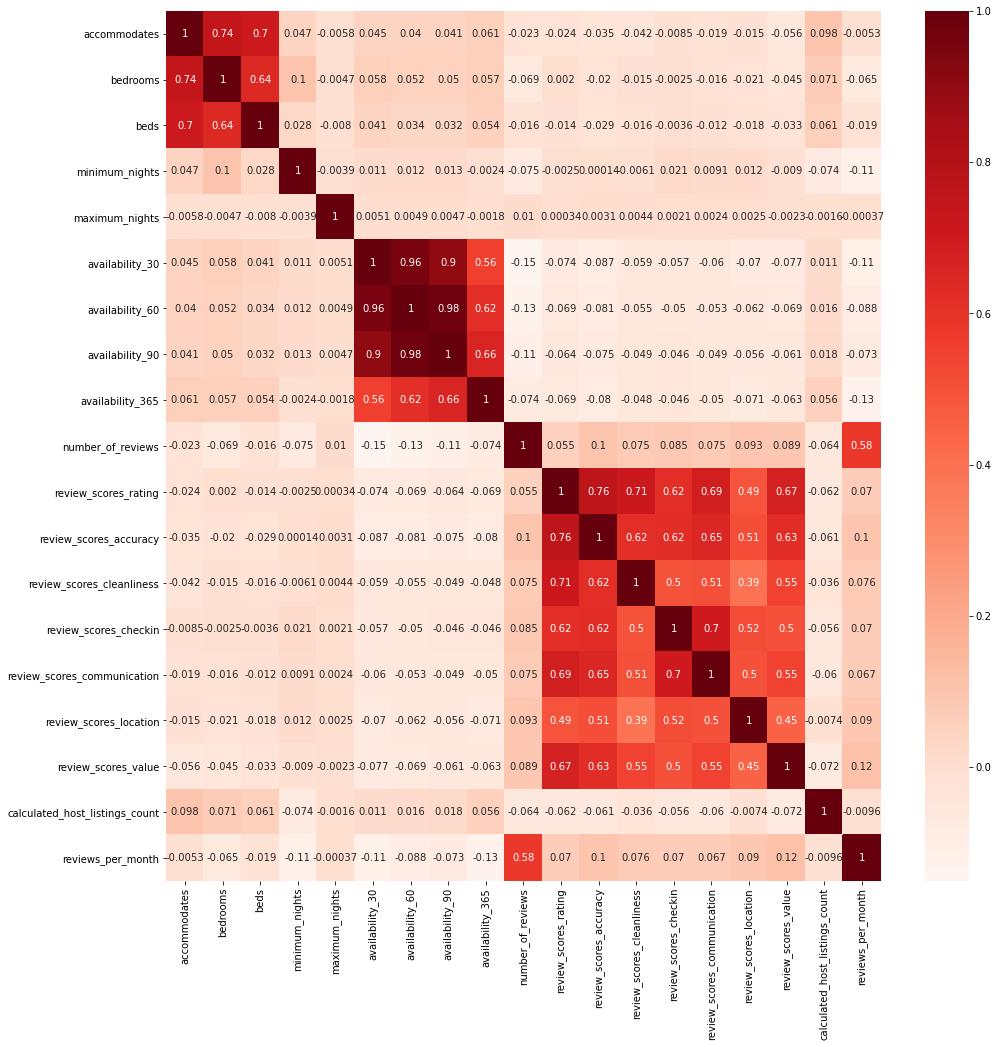

In [22]:
plt.figure(figsize=(16,16))
cor = df_model_float.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Modelo de Regressão

## Seleciona as variáveis independentes e a variável dependente para a regressão

In [25]:
col_reg = [
#'price',
'accommodates',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',
#'minimum_minimum_nights',
#'maximum_minimum_nights',
#'minimum_maximum_nights',
#'maximum_maximum_nights',
#'minimum_nights_avg_ntm',
#'maximum_nights_avg_ntm',
'availability_30',
'availability_60',
'availability_90',
# 'availability_365',
'number_of_reviews',
#'number_of_reviews_ltm',
#'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'calculated_host_listings_count',
#'calculated_host_listings_count_entire_homes',
#'calculated_host_listings_count_private_rooms',
#'calculated_host_listings_count_shared_rooms',
'reviews_per_month'
]

df_model_reg = df_model[col_reg+['price']]

df_model_reg = df_model_reg.dropna()

# df_model_reg.info()

In [26]:
x = df_model_reg[col_reg]

y = df_model_reg['price']

## Normaliza os dados e seleciona amostras de teste e treino

In [27]:
scaler = MinMaxScaler()

x_scaled = scaler.fit(x).transform(x)

# Creates train and test dataframes
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20)

regressor = LinearRegression()

results = regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

## Coeficiente de cada variável independente

In [28]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['coefficient'])

coeff_df.reset_index(inplace=True)

coeff_df = coeff_df.rename(columns = {'index':'feature'})

coeff_df

,feature,coefficient
0,accommodates,5.494935e+02
1,bedrooms,3.464300e+03
2,beds,-1.478271e+03
3,minimum_nights,1.227875e+02
4,maximum_nights,7.397815e+06
5,availability_30,7.685676e+01
6,availability_60,2.349002e+01
7,availability_90,-2.653673e+01
8,number_of_reviews,-5.663957e+01
9,review_scores_rating,3.589953e+02


## Imprime métricas de resultado

In [29]:
regression_results(y_test, y_pred)

Explained Variance:  -51926.574227
Mean Absolute Error:  2878.447356
Median Absolute Error:  123.95153
Mean Squared Error:  19615685116.37259
Root Mean Squared Error:  140056.00707
R2:  -51945.025034
Mean Percentual Error:  9.26974099562526
Acc(RMSE/MAE - 1):  47.656789


## Cria um dataframe com as principais métricas de resultado da regressão

In [30]:
pd.set_option('display.max_rows', 25)

creates_df_compare(y_test,y_pred) 

,actual,pred,error,residue,residue_sqr,var
6790,186.0,166.996306,19.003694,19.003694,361.140386,48391.326553
12526,315.0,660.683955,-345.683955,345.683955,119497.396442,8277.412575
14376,544.0,598.537357,-54.537357,54.537357,2974.323262,19049.441249
9328,250.0,185.741486,64.258514,64.258514,4129.156596,24329.849851
8191,191.0,235.336059,-44.336059,44.336059,1965.686109,46216.523686
...,...,...,...,...,...,...
20024,372.0,817.604821,-445.604821,445.604821,198563.656234,1154.659887
15978,273.0,314.921920,-41.921920,41.921920,1757.447349,17683.756661
12048,222.0,265.214715,-43.214715,43.214715,1867.511627,33848.745908
9583,201.0,307.389706,-106.389706,106.389706,11318.769458,42016.917951


## Curva de erro relativo

Results by manual calculation:
Mean Absolut Error: 2878.4473562338953
Mean Squared Error: 19615685116.37259
Root Mean Squared Error: 140056.0070699311
R-Squared: -51945.02503431831


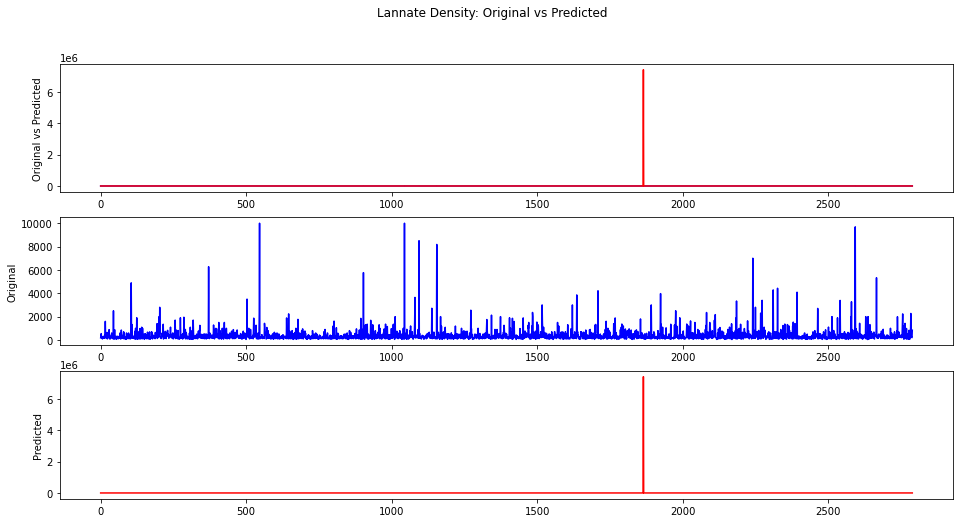

In [31]:
real_vs_predicted(df_model_reg,y_pred,y_test)

## Resultado da OLS

Modelo de mínimos quadrados ordinários

In [32]:
# Creates the regressor model
model_ols = sm.OLS(y_train, x_train)

# Creates the results for the regressor OLS
results_ols = model_ols.fit()

In [33]:
print(results_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.508
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              638.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:48:34   Log-Likelihood:                         -84309.
No. Observations:               11158   AIC:                                  1.687e+05
Df Residuals:                   11140   BIC:                                  1.688e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
y_pred = results_ols.predict(x_test)

creates_df_compare(y_test,y_pred) 

,actual,pred,error,residue,residue_sqr,var
6790,186.0,156.403733,29.596267,29.596267,875.939040,48391.326553
12526,315.0,667.953688,-352.953688,352.953688,124576.306150,8277.412575
14376,544.0,601.324497,-57.324497,57.324497,3286.097922,19049.441249
9328,250.0,183.525102,66.474898,66.474898,4418.912024,24329.849851
8191,191.0,237.402989,-46.402989,46.402989,2153.237422,46216.523686
...,...,...,...,...,...,...
20024,372.0,780.858070,-408.858070,408.858070,167164.921094,1154.659887
15978,273.0,322.195936,-49.195936,49.195936,2420.240151,17683.756661
12048,222.0,269.032432,-47.032432,47.032432,2212.049686,33848.745908
9583,201.0,309.596248,-108.596248,108.596248,11793.145096,42016.917951


In [35]:
regression_results(y_test, y_pred)

Explained Variance:  -75225.951832
Mean Absolute Error:  3417.792851
Median Absolute Error:  123.853949
Mean Squared Error:  28417054155.072933
Root Mean Squared Error:  168573.586766
R2:  -75252.706296
Mean Percentual Error:  11.061101920433634
Acc(RMSE/MAE - 1):  48.322353


Results by manual calculation:
Mean Absolut Error: 3417.7928513321
Mean Squared Error: 28417054155.072876
Root Mean Squared Error: 168573.58676575898
R-Squared: -75252.70629593237


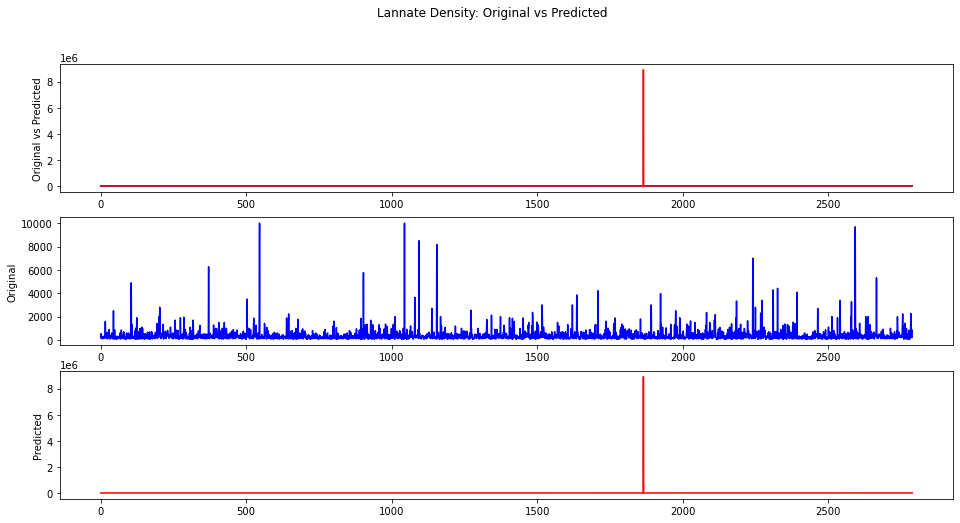

In [36]:
real_vs_predicted(df_model_reg,y_pred,y_test)

# Respostas

a. Como foi a definição da sua estratégia de modelagem?

R: Identifiquei as principais variáveis independentes que fossem numéricas e que fizessem sentido do ponto de vista comercial para conseguir prever a variável resposta "price". Preferi optar por um modelo de regressão multilinear e prever a variável preço da diária da acomodação por ser um excelente modelo naive e de fácil implementação e gerar valor de modo ágil. Avaliei o preenchimento das principais features e eliminei as linhas nulas. Para evitar outliers, retirei acomodações que apareciam menos de 100x no dataframe, isto eliminou inclusive regiões críticas do Rio de Janeiro, como por exemplo favelas de alto risco, restaram regiões de classe A, B e C do Estado.

b. Como foi definida a função de custo utilizada?

R: Não é necessário definir uma função custo para um modelo de mínimos quadrados ordinários, pois o algoritmo tende a minimizar o erro quadrático médio (pode considerar que o erro quadrático médio seja a função custo).

c. Qual foi o critério utilizado na seleção do modelo final?

R: As principais métricas utilizadas para regressão multilinear, erro quadrático médio, erro absoluto médio, erro relativo percentual e R-quadrado. O modelo de regressão do statsmodel apresentou um viés, com um R-quadrado de 100% e erros iguais a zero, com erro relativo muito próximo de zero, por isso preferi utilizar o algoritmo OLS que apresentou resultados muito bons para as principais métricas utilizadas em modelos de regressão, mas sem tanto viés.

d. Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar este método?

R: Utilizei uma amostra de 20% dos registros como teste para o modelo e apliquei o modelo treinado e verifiquei as principais métricas para avaliação de modelos de regressão.

e. Quais evidências você possui de que seu modelo é suficientemente bom?

R: As métricas de avaliação (erro absoluto médio, erro quadrático médio, R-quadrado, erro relativo percentual) apresentam valores razoáveis para o dataframe de teste do modelo.